# SD212: Graph mining
## Lab 3: Graph structure

In this lab, you will learn to:
* work with **sparse matrices**,
* highlight the **small-world property** of a graph,
* estimate the **clustering coefficient** of a graph,
* generate a **Watts-Strogatz** graph with both the small-world property and a high clustering coefficient.

## Import

In [1]:
import networkx as nx

# The documentation is available [here](https://networkx.readthedocs.io/en/stable/).

import numpy as np

from scipy import sparse as sp

import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Datasets

In [3]:
!jt -r

/bin/sh: jt: command not found


You will need the following datasets:
* [Openflights](http://perso.telecom-paristech.fr/~bonald/graphs/openflights.graphml.gz)<br>
Graph of the main international flights. Nodes are airports. The graph is undirected (all flights are bidirectional). Weights correspond to the number of daily flights between airports. Extracted from [Openflights](http://openflights.org).
* [Wikipedia for schools](http://perso.telecom-paristech.fr/~bonald/graphs/wikipedia_schools.graphml.gz)<br> Graph of the hyperlinks between a subset of the pages of the English Wikipedia. The graph is directed and unweighted.
More information [here](https://en.wikipedia.org/wiki/Wikipedia:Wikipedia_for_Schools)
* [Actors-Movies](http://perso.telecom-paristech.fr/~bonald/graphs/actors_movies.graphml.gz)<br>
Graph between actors and movies (a link exists if the actor stars in the movie). The graph is bipartite (see the field 'type' of each node). 
Extracted from [YaGo](http://yago-knowledge.org).



## 1. Sparse matrices

You will work with adjacency matrices in [scipy CSR format](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html).

In [6]:
# A simple graph
graph = nx.erdos_renyi_graph(10, 0.4)

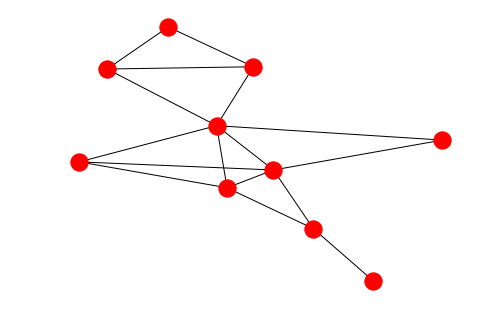

In [7]:
nx.draw(graph)

In [8]:
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 10
Number of edges: 16
Average degree:   3.2000


In [9]:
# Density
n = graph.number_of_nodes()
m = graph.number_of_edges()
density = 2 * m / n / (n - 1)
print(density)

0.35555555555555557


In [10]:
# Dense adjacency matrix (numpy array)
adjacency = nx.to_numpy_array(graph)

In [11]:
adjacency

array([[0., 1., 1., 1., 1., 1., 0., 1., 0., 0.],
       [1., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 1., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 1., 1., 0., 0., 0., 1., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

## CSR format

In [12]:
# Sparse adjacency matrix (scipy csr matrix)
adjacency = nx.to_scipy_sparse_matrix(graph)

In [14]:
print(adjacency)

  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (1, 0)	1
  (1, 2)	1
  (1, 6)	1
  (2, 0)	1
  (2, 1)	1
  (2, 6)	1
  (3, 0)	1
  (3, 4)	1
  (3, 5)	1
  (3, 7)	1
  (3, 8)	1
  (4, 0)	1
  (4, 3)	1
  (4, 5)	1
  (5, 0)	1
  (5, 3)	1
  (5, 4)	1
  (5, 8)	1
  (6, 1)	1
  (6, 2)	1
  (7, 0)	1
  (7, 3)	1
  (8, 3)	1
  (8, 5)	1
  (8, 9)	1
  (9, 8)	1


In [15]:
adjacency.todense()

matrix([[0, 1, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 0, 1, 0, 0, 0, 1, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 1, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 0, 1, 1, 0],
        [1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
        [1, 0, 0, 1, 1, 0, 0, 0, 1, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]], dtype=int64)

In [16]:
# Data
adjacency.data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [17]:
# Indices (columns)
adjacency.indices

array([1, 2, 3, 4, 5, 7, 0, 2, 6, 0, 1, 6, 0, 4, 5, 7, 8, 0, 3, 5, 0, 3,
       4, 8, 1, 2, 0, 3, 3, 5, 9, 8], dtype=int32)

In [18]:
# Index pointers (rows)
adjacency.indptr

array([ 0,  6,  9, 12, 17, 20, 24, 26, 28, 31, 32], dtype=int32)

## To do

* Generate a new random graph of 10 nodes
* Get the corresponding adjacency matrix as numpy array
* Guess the first 3 entries and the last 3 entries of each vector of the adjacency matrix in ```scipy csr format```: ```data, indices, indptr```
* Check your guess.

In [19]:
graph = nx.erdos_renyi_graph(10,0.3)
adjacency = nx.to_numpy_array(graph)

print(adjacency)

[[0. 0. 1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0. 1. 0. 1. 0. 0.]
 [1. 1. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 1. 0. 1. 0. 1.]
 [0. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [1. 1. 1. 1. 1. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 1. 1. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 0. 1. 0.]]


In [20]:
#Guess
# data = [1,1,1, ...., 1,1,1]
# indices = [2,4,5,.....,6,7,8]
# indptr = [0,5,7,....,7,8,9]

adjacency = nx.to_scipy_sparse_matrix(graph)

print(adjacency.data)
print(adjacency.indices)
print(adjacency.indptr)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]
[2 5 9 2 3 5 7 0 1 5 8 1 4 5 7 9 3 5 8 0 1 2 3 4 7 8 1 3 5 8 2 4 5 7 9 0 3
 8]
[ 0  3  7 11 16 19 26 26 30 35 38]


## Using sparse matrices

In [21]:
def get_degrees(adjacency):
    n = adjacency.shape[0]
    return adjacency.dot(np.ones(n, dtype = int)) # sum of each row

In [22]:
get_degrees(adjacency)

array([3, 4, 4, 5, 3, 7, 0, 4, 5, 3], dtype=int64)

In [23]:
def get_neighbors(adjacency, node):
    n = adjacency.shape[0]
    unit_vector = np.zeros(n, dtype = int)
    unit_vector[node] = 1 
    return adjacency.dot(unit_vector) # get row of the node

In [24]:
get_neighbors(adjacency, 0)

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

## To do

* Write a function computing the distances from any given node (see below).<br>
Use distance -1 for nodes that are not accessible.

In [26]:
def get_distances(adjacency, node):
    n = adjacency.shape[0]
    distances = -np.ones(n, dtype = int)
    distances[node] = 0
    E = np.zeros(n)
    E[node] = 1
    for i in range(1,n):
        E = adjacency.dot(E)
        for k in range(n):
            if E[k] != 0 and distances[k] == -1 and k != node:
                distances[k]=i
    return distances

get_distances(adjacency,0)

array([ 0,  2,  1,  2,  2,  1, -1,  2,  2,  1])

## 2. Small-world property

You will now make a few experiments highlighting the small-world property.

## To do

* Which fraction of the airports can be reached from Paris Charles de Gaulle in 1, 2, 3 flights?
* Which fraction of the pages are accessible from Paris in 1, 2, 3 clicks on Wikipedia for Schools?

In [27]:
openflights = nx.read_graphml("openflights.graphml", node_type = int)

In [28]:
openflights.node[0]["name"]

def get_airport_indice_from_name(graph,name):
    for i in range(len(graph.node)):
        node = graph.node[i]
        if node["name"] == name:
            return i
    return -1

Paris_node = get_airport_indice_from_name(openflights, "Charles de Gaulle International Airport")

In [29]:
weighted_adjacency = nx.to_scipy_sparse_matrix(openflights)
adjacency = nx.to_scipy_sparse_matrix(openflights, weight = None)

In [30]:
p=nx.shortest_path_length(openflights, source=Paris_node)
fraction = len(p)/len(openflights.node)
distances = [kv[1] for kv in p.items()]
p_sum = 0
for dist in distances:
    if dist>0 and dist<=3:
        p_sum+=1
p_sum

fraction = p_sum/len(openflights.node)
fraction

0.9086212463674523

In [31]:
wiki = nx.read_graphml("wikipedia_schools.graphml", node_type=int)

In [32]:
wiki.node[46]["name"]

'Paris'

In [33]:
Paris_node = get_airport_indice_from_name(wiki, 'Paris')
Paris_node

46

In [34]:
p=nx.shortest_path_length(wiki, source=Paris_node)
fraction = len(p)/len(wiki.node)
distances = [kv[1] for kv in p.items()]
p_sum = 0
for dist in distances:
    if dist>0 and dist<=3:
        p_sum+=1
p_sum

fraction = p_sum/len(wiki.node)
fraction

0.7643214985841864

## To do

Plot the histogram of the distance between two random airports sampled:
1. uniformly
2. in proportion to their degrees
### 3. in proportion to their traffics

Use 100 samples per histogram.

Interpret the results.

**Hint:** For 2 and 3, use the parameter ```p``` of the function ```np.random.choice```.

(array([ 1., 10., 27., 36., 15.,  8.,  2.,  0.,  0.,  1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

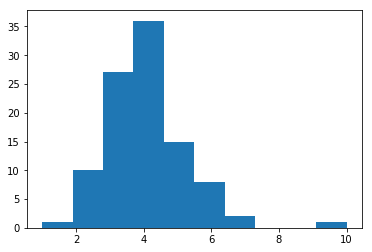

In [35]:
# Two random airports, uniform sampling
airports = list(openflights.nodes())
distances_airports_uniform = []
for i in range(100):
    u,v = np.random.choice(airports, size = 2, replace = False)
    distances_airports_uniform.append(nx.shortest_path_length(openflights, u, v))
plt.hist(distances_airports_uniform)


(array([12.,  0., 46.,  0.,  0., 29.,  0., 10.,  0.,  3.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

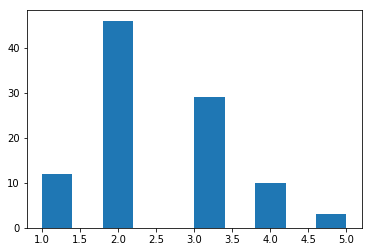

In [36]:
# Two random airports, sampling in proportion of their degree
airports = list(openflights.nodes())
degrees = [kv[1] for kv in list(openflights.degree)]
degrees_proba = degrees / np.sum(degrees)

distances_airports_uniform = []
for i in range(100):
    u,v = np.random.choice(airports, size = 2, replace = False, p=degrees_proba)
    distances_airports_uniform.append(nx.shortest_path_length(openflights, u, v))
plt.hist(distances_airports_uniform)

## To do

* Find two airports with degree of separation higher than 8, and show the corresponding path on a map.
* Plot the histograms of the distances from each of these airports to all other airports.

In [37]:
airport_adj = nx.to_scipy_sparse_matrix(openflights)

airport_distance = get_distances(airport_adj, 0)

In [43]:
np.where(airport_distance>8)

(array([2277, 2287]),)

In [44]:
path = nx.shortest_path(openflights, 0, 2277)
path

[0, 4, 1040, 124, 85, 56, 2253, 2290, 2248, 2277]

In [45]:
# Get positions
pos_x = nx.get_node_attributes(openflights,'pos_x')
pos_y = nx.get_node_attributes(openflights,'pos_y')
pos = {u: (pos_x[u], pos_y[u]) for u in openflights.nodes()}

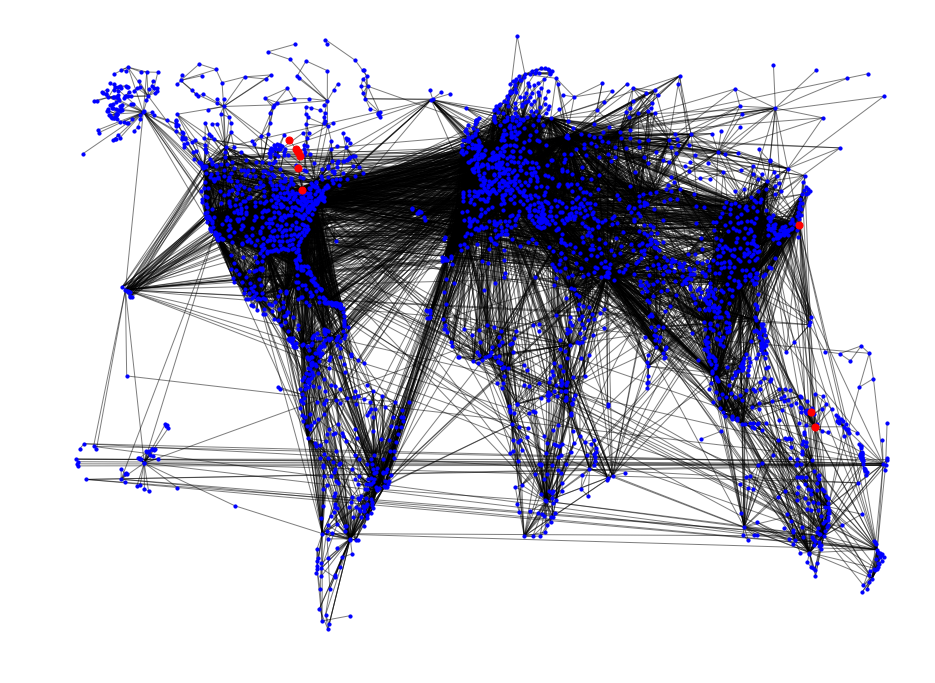

In [46]:
# Visualization
plt.figure(figsize=(16,12))
plt.axis('off')
nx.draw_networkx_nodes(openflights, pos, node_size = 10, node_color = 'b')
nx.draw_networkx_nodes(openflights, pos, nodelist = path, node_size = 50, node_color = 'r')
edges = nx.draw_networkx_edges(openflights, pos, arrows = False, alpha = 0.5)
plt.show()

## To do

* Plot the histogram of the distances **from** Plato **to** any other page in Wikipedia for Schools (provided a path exists).
* Plot the histogram of the distances **to** Plato **from** any other page in Wikipedia for Schools (provided a path exists).

In [47]:
wiki = nx.read_graphml("wikipedia_schools.graphml", node_type = int)
nx.info(wiki)

'Name: \nType: DiGraph\nNumber of nodes: 4591\nNumber of edges: 119859\nAverage in degree:  26.1074\nAverage out degree:  26.1074'

In [48]:
node_plato = get_airport_indice_from_name(wiki, "Plato")
node_plato

245

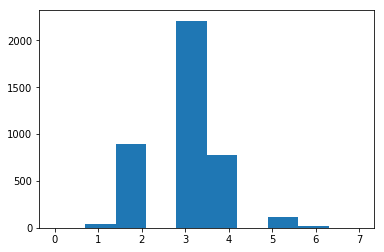

In [51]:
distance_plato = nx.shortest_path_length(wiki, source=node_plato)
plt.hist(distance_plato.values())
plt.show()

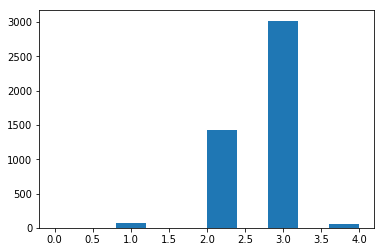

In [52]:
distance_plato = nx.shortest_path_length(wiki, target=node_plato)
plt.hist(distance_plato.values())
plt.show()

## To do

* Plot the histogram of the [Bacon number](https://fr.wikipedia.org/wiki/Six_Degrees_of_Kevin_Bacon) of actors (**without** building the co-starring actor graph).

In [53]:
actors = nx.read_graphml("actors_movies.graphml", node_type = int)
print(nx.info(actors))

Name: Actors-Movies
Type: Graph
Number of nodes: 133026
Number of edges: 304006
Average degree:   4.5706


In [54]:
node_bacon = get_airport_indice_from_name(actors, "Kevin Bacon")
node_bacon

4664

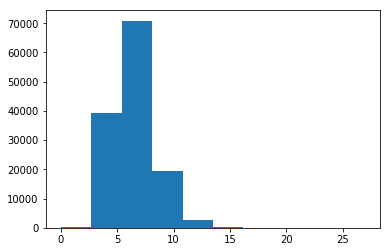

In [55]:
bacon_numbers = nx.shortest_path_length(actors, target=node_bacon)
plt.hist(bacon_numbers.values())
plt.show()

## 3. Clustering coefficient

You will now learn to compute the clustering coefficient of a graph.

## To do

* Show that the clustering coefficient of node $u$ is equal to:
$$
C_u = \frac {N_u} {d_u(d_u-1)}
$$
where $N_u$ is the total number of paths of length 2 from $u$ to a neighbor of $u$.
* Write a function to compute the clustering coefficient of a node (see below).
* Deduce the clustering coefficient of the graph, given by:
$$
C = \frac{\sum_u d_u(d_u -1)C_u}{\sum_u d_u(d_u -1)}.
$$
* Compute the clustering coefficient of Openflights and Wikipedia for Schools (seen as an undirected graph).
* Compare your results with those of the function ```nx.average_clustering``` and explain the differences, if any.

In [56]:
from tqdm import tqdm_notebook as tqdm

In [57]:
def get_local_clustering_coefficient(adjacency, node):
    n = adjacency.shape[0]
    coefs = np.zeros(n)

    du = np.sum(adjacency[node])
    
    if du == 1:
        return 0 # un seul voisin donc aucun chemin a 2 saut possible
    
    Nu = 0
    
    node_neighbords = get_neighbors(adjacency=adjacency, node=node)
    
    for neighbor in np.where(node_neighbords == 1)[0]:

        neighbor_of_neighbor = get_neighbors(adjacency, neighbor)

        for neigh in np.where(neighbor_of_neighbor == 1)[0]:

            if neigh in np.where(node_neighbords == 1)[0]:
                if neigh == neighbor:
                    continue
                Nu += 1
    
    Cu = Nu/((du)*(du-1))
    
    return Cu

In [59]:
print(adjacency)

  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (1, 4)	1
  (1, 5)	1
  (1, 2214)	1
  (1, 2220)	1
  (2, 0)	1
  (2, 1)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 2215)	1
  (2, 2217)	1
  (2, 2218)	1
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 4)	1
  (3, 2207)	1
  (3, 2209)	1
  :	:
  (3080, 1647)	1
  (3080, 1987)	1
  (3080, 2053)	1
  (3081, 1652)	1
  (3081, 1654)	1
  (3082, 1622)	1
  (3082, 1645)	1
  (3082, 2715)	1
  (3083, 1535)	1
  (3084, 1544)	1
  (3085, 1544)	1
  (3086, 1539)	1
  (3087, 2678)	1
  (3088, 1609)	1
  (3089, 1618)	1
  (3089, 2719)	1
  (3090, 2719)	1
  (3091, 463)	1
  (3091, 465)	1
  (3092, 459)	1
  (3093, 1502)	1
  (3093, 2627)	1
  (3094, 1548)	1
  (3095, 2593)	1
  (3096, 1651)	1


In [62]:
get_local_clustering_coefficient(adjacency, 4)

0.12096774193548387

In [63]:
np.where(adjacency.todense()[4] == 1)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([   0,    1,    2,    3,    5,  894, 1040, 1097, 1462, 1584, 1587,
        1589, 1615, 1922, 2018, 2101, 2205, 2206, 2207, 2208, 2209, 2210,
        2211, 2212, 2213, 2214, 2215, 2217, 2218, 2219, 2220, 2221]))

In [64]:
import math

def get_clustering_coefficient(adjacency):
    coef = 0
    # to be completed
    n = adjacency.shape[0]
    denominateur = 0
    numerateur = 0
    for u in tqdm(range(n)):
        du = np.sum(adjacency[u])
        if du==1:
            continue
        else:
            denominateur += du*(du-1)
            local_clustering_coef_u = get_local_clustering_coefficient(adjacency,u)
            numerateur += du*(du-1)*local_clustering_coef_u
            
    coef = numerateur/denominateur

    return numerateur, denominateur, coef

In [65]:
numerateur, denominateur, coef = get_clustering_coefficient(adjacency)

In [67]:
coef

0.25107219520077

In [68]:
numerateur, denominateur, coef = get_clustering_coefficient(airport_adj)

In [69]:
coef

0.01354720044604473

In [70]:
numerateur

103896.0

In [71]:
denominateur

7669186

In [72]:
nx.average_clustering(openflights)

0.47104596951619976

# 4. Watts-Strogatz model

Watts-Strogatz graphs have both the small-world property and a high clustering coefficient, for propertly chosen parameters.

In [73]:
graph = nx.watts_strogatz_graph(20,4,0)

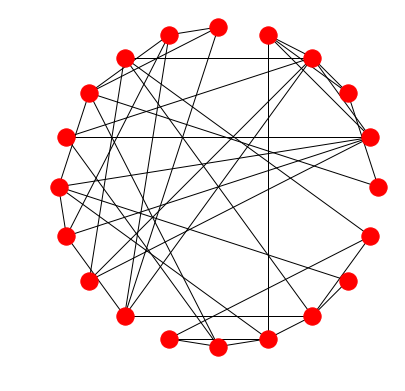

In [85]:
plt.figure(figsize = (5,5))
nx.draw_circular(graph)

In [75]:
graph = nx.watts_strogatz_graph(20,4,0.5)

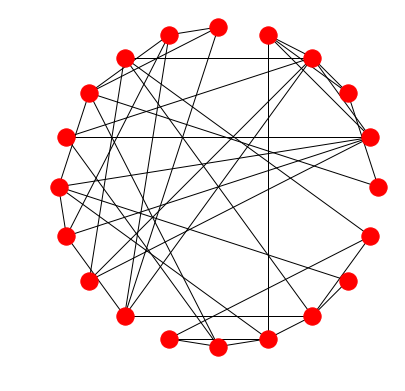

In [76]:
plt.figure(figsize = (5,5))
nx.draw_circular(graph)

## To do

Generate a graph of 10,000 nodes with:
* average degree 20,
* average clustering coefficent larger than 0.5,
### * average degree of separation less than 6.

**Hint:** To get an upper bound on the average path length between any pair of distinct nodes, you can consider all paths going through some well chosen node(s). 

In [106]:
graph = nx.watts_strogatz_graph(20,4,0.5)

In [123]:
def get_average_degree(graph):
    return float(nx.info(graph).split('\n')[4].split()[2])

In [134]:
graph = nx.watts_strogatz_graph(10000, 20, 0.5)
print(get_average_degree(graph))
print(nx.average_clustering(graph))

20.0
0.09248414870355895
